# Country Continent K Means Clustering

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('Categorical.csv')
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


## Map the data

In [3]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


## Select the features

In [4]:
x = data_mapped.iloc[:,1:4]

## Clustering

In [5]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(n_clusters=7)

## Clustering results

In [6]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 1, 5, 3, 6, 6, 6, 1, 3, 1, 4, 5, 2, 5, 3, 2, 6, 1, 5, 6, 0, 0,
       1, 6, 1, 3, 3, 6, 3, 6, 3, 3, 3, 3, 3, 2, 1, 5, 0, 6, 3, 2, 0, 0,
       5, 0, 4, 3, 5, 0, 3, 3, 3, 3, 1, 1, 6, 6, 1, 3, 6, 3, 0, 3, 1, 1,
       6, 6, 1, 6, 2, 3, 6, 6, 2, 0, 6, 1, 6, 0, 0, 0, 0, 0, 6, 3, 6, 3,
       2, 3, 2, 5, 3, 6, 3, 6, 2, 6, 1, 2, 5, 6, 1, 1, 6, 1, 6, 3, 6, 1,
       2, 1, 1, 5, 1, 2, 3, 3, 2, 6, 1, 2, 1, 0, 6, 3, 6, 1, 5, 6, 6, 6,
       2, 3, 0, 6, 6, 5, 1, 3, 2, 6, 0, 6, 2, 6, 2, 2, 5, 0, 3, 5, 5, 2,
       5, 2, 0, 2, 0, 3, 4, 6, 6, 1, 2, 2, 1, 1, 3, 4, 3, 2, 2, 2, 6, 3,
       2, 6, 3, 1, 4, 1, 6, 1, 5, 0, 1, 1, 5, 0, 2, 3, 0, 2, 0, 3, 6, 1,
       5, 3, 6, 0, 3, 6, 6, 6, 5, 3, 5, 1, 3, 0, 0, 2, 1, 1, 2, 4, 3, 6,
       1, 2, 5, 5, 6, 3, 3, 1, 6, 3, 3, 3, 3, 2, 2, 4, 4, 1, 5, 5, 5])

In [7]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,3
1,Afghanistan,66.004734,33.835231,2,1
2,Angola,17.537368,-12.293361,3,5
3,Anguilla,-63.064989,18.223959,0,3
4,Albania,20.049834,41.142450,1,6


## Plot the data

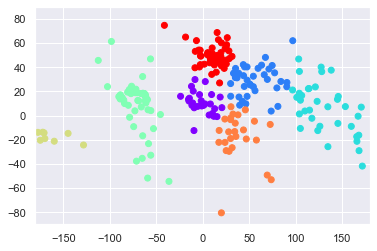

In [8]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## WCSS

In [9]:
kmeans.inertia_

127874.87748531076

In [12]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[1414520.2109547602,
 657647.2003208962,
 325824.7315279083,
 257128.77997915697,
 192671.12078081234,
 152295.697115376,
 127247.77209830385,
 103159.07505299893,
 85167.44506130263,
 76659.74128372791,
 71162.1679370243,
 63724.45189907132,
 57636.221558879915,
 56256.05222786833,
 50591.544942455206,
 47029.19551739542,
 44782.39967556907,
 42366.06214885196,
 39474.54702574832]

## Elbow Method

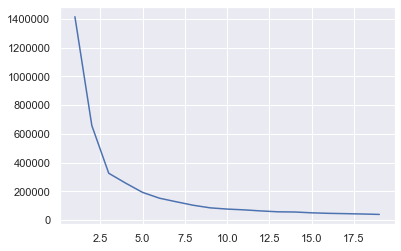

In [13]:
n_clusters = range(1,20)
plt.plot(n_clusters,wcss)

# END!!!